In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("Delhi_Pollution_data.xlsx")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2020-07-01,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101,Moderate
1,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114,Moderate
2,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233,Poor
3,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196,Moderate
4,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112,Moderate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
City          2009 non-null object
Date          2009 non-null datetime64[ns]
PM2.5         2009 non-null float64
PM10          2009 non-null float64
NO            2009 non-null float64
NO2           2009 non-null float64
NOx           2009 non-null float64
NH3           2009 non-null float64
CO            2009 non-null float64
SO2           2009 non-null float64
O3            2009 non-null float64
Benzene       2009 non-null float64
Toluene       2009 non-null float64
Xylene        2009 non-null float64
AQI           2009 non-null int64
AQI_Bucket    2009 non-null object
dtypes: datetime64[ns](1), float64(12), int64(1), object(2)
memory usage: 251.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df_pca = df.drop(['City','Date','AQI','AQI_Bucket'],axis=1)

In [7]:
df_pca.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65
1,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49
2,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13
3,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74
4,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43


In [8]:
len(df_pca.columns)

12

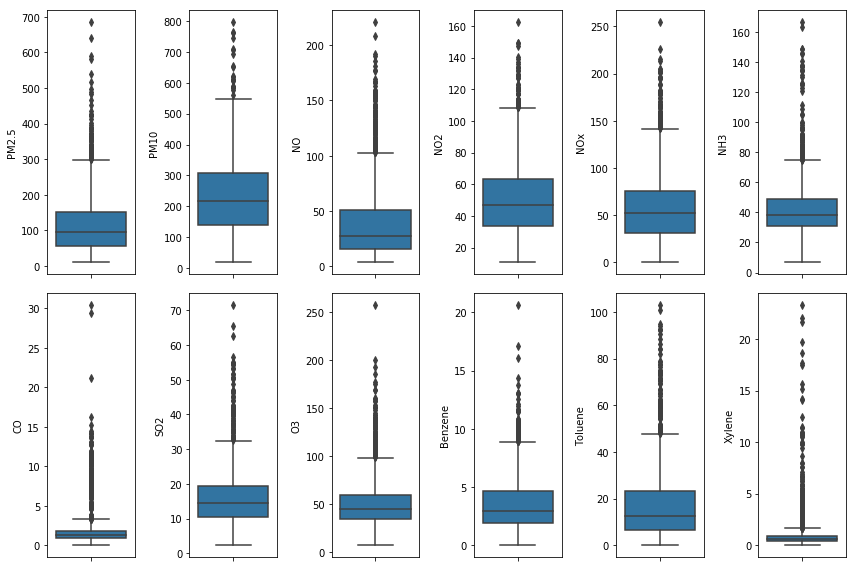

In [9]:
plt.figure(figsize=(12,8))
features_list = df_pca.columns
for i in range(len(features_list)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y=df_pca[features_list[i]],data=df_pca)
    plt.tight_layout()

In [10]:
def detect_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    upper_range = Q3+1.5*IQR
    return lower_range, upper_range

In [11]:
for i in features_list:
    LL,UL = detect_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i]>UL,UL,df_pca[i])
    df_pca[i] = np.where(df_pca[i]<LL,LL,df_pca[i])
    print("Lower Range : ",LL," & upper Range : ",UL)

Lower Range :  -86.73500000000004  & upper Range :  296.82500000000005
Lower Range :  -114.04499999999999  & upper Range :  560.235
Lower Range :  -36.330000000000005  & upper Range :  102.95
Lower Range :  -10.605000000000004  & upper Range :  108.075
Lower Range :  -35.165  & upper Range :  141.675
Lower Range :  5.029999999999998  & upper Range :  74.87
Lower Range :  -0.5300000000000001  & upper Range :  3.3100000000000005
Lower Range :  -2.889999999999997  & upper Range :  32.709999999999994
Lower Range :  -4.6200000000000045  & upper Range :  98.58000000000001
Lower Range :  -2.3449999999999998  & upper Range :  8.895
Lower Range :  -18.174999999999997  & upper Range :  48.02499999999999
Lower Range :  -0.34  & upper Range :  1.6600000000000001


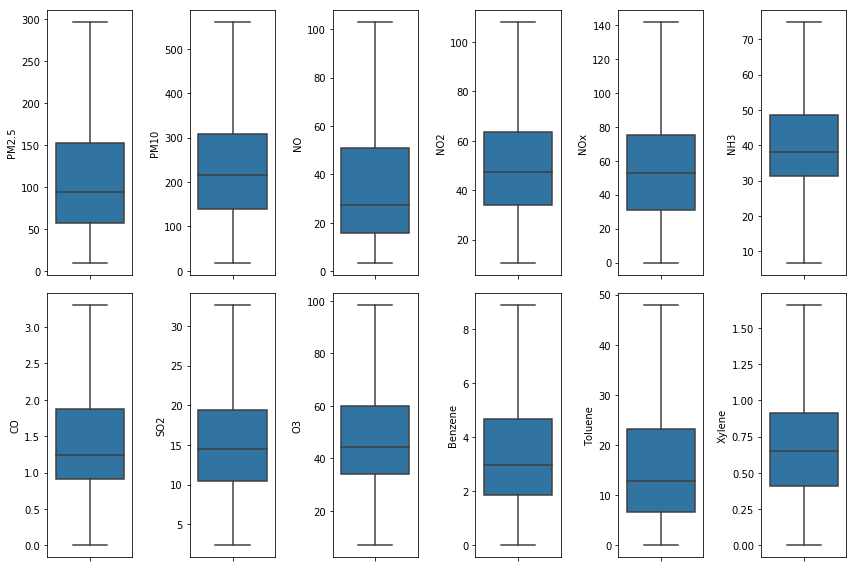

In [12]:
plt.figure(figsize=(12,8))
features_list = df_pca.columns
for i in range(len(features_list)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y=df_pca[features_list[i]],data=df_pca)
    plt.tight_layout()

In [13]:
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [14]:
df_pca_scaled.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,-0.823814,-0.881449,-1.103682,-1.364231,-1.171197,-0.876637,-0.569198,-0.666182,-0.949903,-0.650850,0.571394,-0.164550
1,-1.017968,-1.196500,-1.115885,-1.507767,-1.210540,-0.919203,-0.721007,-0.764968,-0.587956,-0.857296,0.000887,-0.470643
2,-0.948832,-0.405093,-0.954015,-1.340076,-1.023879,-0.956633,-0.674297,-0.599811,-1.099278,-0.605970,0.589619,0.753730
3,-0.748529,0.664518,-0.876131,-1.338682,-0.968742,-0.861224,-0.604231,-0.735641,-1.509101,-0.794465,0.695004,1.767664
4,-1.017968,-0.647136,-0.940376,-1.345186,-1.008659,-0.702700,-0.685974,-0.785033,-1.469363,-0.803441,0.287725,-0.585428


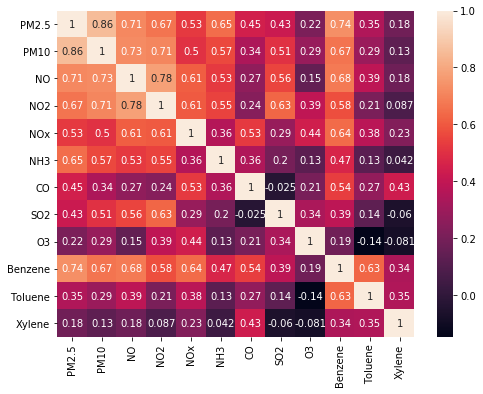

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pca_scaled.corr(),annot=True)

In [16]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_pca_scaled)
kmo_model

0.8376519436323342

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [19]:
pca_transformed

array([[-2.66533352, -0.91617956, -0.79021233, ..., -0.12716269,
         0.04936147,  0.02218708],
       [-3.15643913, -0.41145617, -0.38495342, ..., -0.00689983,
         0.1975952 ,  0.10767996],
       [-2.35484127, -1.34779854, -0.88137821, ..., -0.32725765,
         0.0282525 , -0.35546333],
       ...,
       [-0.44278896, -3.04827969,  0.85077063, ...,  0.09847784,
         0.18416251, -0.2850144 ],
       [ 1.77853321, -3.40818408,  0.56303903, ...,  0.98704134,
         0.14538536,  0.02488423],
       [ 3.87623969, -2.8650807 ,  0.44676308, ..., -0.08853955,
         0.06223242, -0.32596818]])

In [20]:
pca.components_

array([[ 0.36757983,  0.35874864,  0.3586897 ,  0.34856375,  0.31661476,
         0.27264851,  0.22407402,  0.2354441 ,  0.14900296,  0.35967138,
         0.20036925,  0.11870582],
       [ 0.01788055,  0.12180783,  0.07920562,  0.25502423, -0.07185109,
         0.06976372, -0.37463646,  0.38778796,  0.33653904, -0.20718676,
        -0.41848144, -0.53052722],
       [-0.10244197, -0.1082965 , -0.23877719, -0.02680145,  0.329494  ,
        -0.04259609,  0.46126311, -0.1934286 ,  0.65938621, -0.06805854,
        -0.32861601,  0.10988637],
       [ 0.2517615 ,  0.14172243, -0.04998115, -0.05800976, -0.19614686,
         0.64557842,  0.21025355, -0.42214395, -0.25004424, -0.10221822,
        -0.35987447, -0.17472887],
       [-0.02951417, -0.10587218, -0.06664532, -0.15232101,  0.3156141 ,
         0.03492092,  0.00652305, -0.27840717,  0.07088788,  0.1881715 ,
         0.44708658, -0.73591565],
       [-0.33778676, -0.35252369,  0.38787525,  0.34686121,  0.49700404,
         0.18451077, -

In [21]:
pca.explained_variance_

array([5.71418983, 1.73516949, 1.14758734, 0.95455182, 0.63944041,
       0.46998204, 0.36503474, 0.34686872, 0.1906889 , 0.16883957,
       0.15442402, 0.11919921])

In [22]:
pca.explained_variance_ratio_

array([0.47594546, 0.14452548, 0.09558468, 0.07950639, 0.05326018,
       0.03914568, 0.03040442, 0.02889134, 0.01588283, 0.01406296,
       0.01286226, 0.00992832])

In [23]:
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2','PC3','PC4','PC5','PC6',
                                                'PC7','PC8','PC9','PC10','PC11','PC12'], 
                                     index=df_pca_scaled.columns)

In [24]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514,-0.337787,0.065633,0.275665,0.086309,-0.123236,-0.164356,0.738761
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872,-0.352524,0.123756,0.469464,-0.192561,-0.218866,0.015977,-0.606809
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645,0.387875,-0.144580,0.198196,0.126583,0.155804,0.736009,0.092056
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321,0.346861,0.022629,-0.052348,-0.576914,0.421731,-0.385366,0.058499
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614,0.497004,-0.093880,0.218380,0.227118,-0.446437,-0.302527,-0.044863
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921,0.184511,0.277003,-0.566976,0.115428,-0.193869,0.039794,-0.127519
CO,0.224074,-0.374636,0.461263,0.210254,0.006523,-0.203209,-0.607033,-0.152714,-0.298226,0.032584,0.170692,-0.013601
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407,-0.223017,-0.365280,-0.437689,0.135554,-0.322230,-0.063257,-0.010476
O3,0.149003,0.336539,0.659386,-0.250044,0.070888,-0.218104,0.448666,-0.101397,-0.002582,0.103173,0.293715,0.078303
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172,-0.207380,-0.020012,-0.090417,0.531238,0.589204,-0.224580,-0.214074


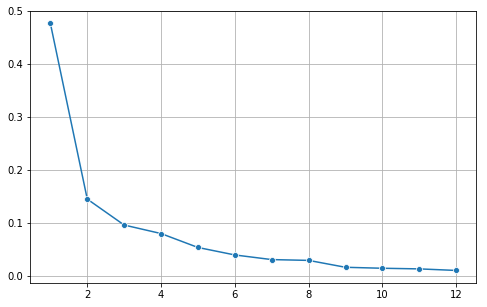

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_,x= range(1,13),marker='o')
plt.grid()

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47594546, 0.62047094, 0.71605562, 0.79556201, 0.84882219,
       0.88796786, 0.91837228, 0.94726362, 0.96314645, 0.97720941,
       0.99007168, 1.        ])

In [27]:
df_selected = df_extracted_loadings[['PC1','PC2','PC3','PC4','PC5']]
df_selected

,PC1,PC2,PC3,PC4,PC5
PM2.5,0.367580,0.017881,-0.102442,0.251761,-0.029514
PM10,0.358749,0.121808,-0.108297,0.141722,-0.105872
NO,0.358690,0.079206,-0.238777,-0.049981,-0.066645
NO2,0.348564,0.255024,-0.026801,-0.058010,-0.152321
NOx,0.316615,-0.071851,0.329494,-0.196147,0.315614
NH3,0.272649,0.069764,-0.042596,0.645578,0.034921
CO,0.224074,-0.374636,0.461263,0.210254,0.006523
SO2,0.235444,0.387788,-0.193429,-0.422144,-0.278407
O3,0.149003,0.336539,0.659386,-0.250044,0.070888
Benzene,0.359671,-0.207187,-0.068059,-0.102218,0.188172


In [28]:
pca = PCA(n_components= 5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [29]:
pca_final

array([[-2.66533352, -0.91617956, -0.79021233, -0.2455179 ,  0.36723852],
       [-3.15643913, -0.41145617, -0.38495342, -0.15069745,  0.39861261],
       [-2.35484127, -1.34779854, -0.88137821, -0.48326526, -0.33839253],
       ...,
       [-0.44278896, -3.04827969,  0.85077063,  2.76063513, -0.76167397],
       [ 1.77853321, -3.40818408,  0.56303903,  0.28977054, -0.13105004],
       [ 3.87623969, -2.8650807 ,  0.44676308,  0.52568745, -0.17617492]])

In [30]:
final_df = pd.DataFrame(pca_final,columns = df_selected.columns)
final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-2.665334,-0.916180,-0.790212,-0.245518,0.367239
1,-3.156439,-0.411456,-0.384953,-0.150697,0.398613
2,-2.354841,-1.347799,-0.881378,-0.483265,-0.338393
3,-1.829266,-1.964523,-1.144289,-0.255720,-1.167517
4,-2.781773,-0.676409,-1.105102,0.156680,0.541447
5,-2.552951,-1.016836,-0.896148,-0.122146,0.308240
6,-2.974647,-0.688794,-0.713432,-0.076641,0.467709
7,-3.461293,-0.243401,-0.666444,0.260655,0.516457
8,-3.394853,-0.254105,-0.564833,0.252188,0.474779
9,-2.949465,-0.223915,-0.256325,-0.014562,0.662630


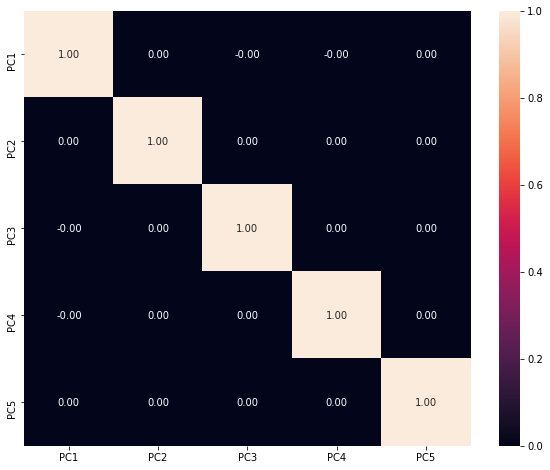

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(),annot=True, fmt='.2f');